A SaaS company has a website where customers can signup for their service on a monthly basis. The marketing team wants to know if offering 50% off the service for the first month to randomly selected customers will increase the number of subscriptions and if this will be profitable long term. Currently the rate of people who subscribe after browsing the product page is 25%. The team wants to see if an AB test can show a lift of 5% to a subscribe rate of 30%. 

In [23]:
import numpy as np
from numpy import random
import pandas as pd
import scipy as sp
import statsmodels.stats.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math, datetime, random
from datetime import date,time,timedelta

In [24]:
#Find minimum of website visits for significant results
effectSize = sm.proportion_effectsize(0.25, 0.3)

min_n = sm.NormalIndPower().solve_power(
    effectSize, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    ) 
min_n=math.ceil(min_n)
print('Effect Size: ',effectSize)
print('Minimum N: ',min_n)

Effect Size:  -0.11208192953081064
Minimum N:  1250


In [25]:
#Create data to simulate past 12 months of subscription data
visits=random.randint(40000,45000)
idnum=np.arange(1,visits+1)
startdate=date(2018,5,1)
enddate=date(2019,4,30)
daysbetween=enddate-startdate
daynum=np.arange(daysbetween.days)
visitdays=np.random.choice(daynum,size=visits)

visittime=np.random.normal(loc=12, scale=3.0, size=visits)
negative = visittime < 0
maxtime=visittime>24

visittime[negative]=0
visittime[maxtime]=24
negative = visittime < 0
maxtime=visittime>24

sec=visittime*3600
sec=sec.astype(int)
t=pd.to_timedelta(sec, unit='S', errors='raise')

daytime=pd.DataFrame()
daytime['Days']=visitdays

daytime['Days']=pd.to_timedelta(daytime['Days'], unit='D', errors='raise')
start=np.full(visits,startdate)
daytime['Date']=daytime['Days']+start

daytime['Time']=t
daytime['Time']=daytime['Time'].astype('string')
daytime['Time']=daytime['Time'].str.slice(start=7)
daytime['Date']=daytime['Date'].astype('string')
daytime['DateTime']=pd.to_datetime(daytime['Date'] + daytime['Time'], format='%Y-%m-%d%H:%M:%S')

subscribed=np.random.choice([0,1],size=visits,p=[.75,.25])
daytime['Subscribe']=subscribed
print(daytime)

42182


C:\Users\re487\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


          Days        Date      Time            DateTime  Subscribe
0     320 days  2019-03-17  12:21:54 2019-03-17 12:21:54          0
1     161 days  2018-10-09  15:08:37 2018-10-09 15:08:37          0
2     175 days  2018-10-23  11:23:35 2018-10-23 11:23:35          1
3     123 days  2018-09-01  10:57:41 2018-09-01 10:57:41          0
4     156 days  2018-10-04  16:22:10 2018-10-04 16:22:10          0
...        ...         ...       ...                 ...        ...
42177 247 days  2019-01-03  10:28:46 2019-01-03 10:28:46          0
42178 104 days  2018-08-13  07:19:18 2018-08-13 07:19:18          0
42179 211 days  2018-11-28  06:57:37 2018-11-28 06:57:37          0
42180 211 days  2018-11-28  08:35:20 2018-11-28 08:35:20          0
42181 184 days  2018-11-01  14:38:16 2018-11-01 14:38:16          0

[42182 rows x 5 columns]


In [39]:
#Create data to simulate experiment
month=visits/12
month2=int(month//2)
month=int(month2*2)
expdays=np.arange(1,32)

actualdays=np.random.choice(expdays,size=month)
df=pd.DataFrame()
df['Days']=pd.to_timedelta(actualdays, unit='D', errors='raise')
start2=np.full(month,enddate)
df['Date']=df['Days']+start2


visittime2=np.random.normal(loc=12, scale=3.0, size=month)
negative = visittime2 < 0
maxtime=visittime2>24
visittime2[negative]=0
visittime2[maxtime]=24
negative = visittime2 < 0
maxtime=visittime2>24

sec=visittime2*3600
sec=sec.astype(int)
t2=pd.to_timedelta(sec, unit='S', errors='raise')
df['Time']=t2
df['Time']=df['Time'].astype('string')
df['Time']=df['Time'].str.slice(start=7)
df['Date']=df['Date'].astype('string')
df['DateTime']=pd.to_datetime(df['Date'] + df['Time'], format='%Y-%m-%d%H:%M:%S')

#Create 50/50 control/treatment label list
a=np.full(month2,'control',dtype=(str,7))
b=np.full(month2,'treatment',dtype=(str,9))

#Create success rate for each group
asubscribed=np.random.choice([0,1],size=month2,p=[.75,.25])
bsubscribed=np.random.choice([0,1],size=month2,p=[.7,.3]) 

#Concatenate the seperate arrays
group=np.concatenate((a,b),axis=0)
subscribed=np.concatenate((asubscribed,bsubscribed),axis=0)

df['Group']=group
df['Subscribed']=subscribed
df.drop(columns=['Date', 'Days','Time'],inplace=True)

print(df)

                DateTime      Group  Subscribed
0    2019-05-07 12:58:33    control           0
1    2019-05-03 05:09:07    control           0
2    2019-05-31 16:12:27    control           0
3    2019-05-21 13:25:22    control           0
4    2019-05-06 09:27:03    control           0
...                  ...        ...         ...
3509 2019-05-30 08:10:00  treatment           0
3510 2019-05-16 13:02:39  treatment           1
3511 2019-05-21 18:25:22  treatment           0
3512 2019-05-11 09:05:53  treatment           0
3513 2019-05-21 10:58:47  treatment           0

[3514 rows x 3 columns]


C:\Users\re487\anaconda3\lib\site-packages\pandas\core\arrays\datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


In [40]:
#Split dataframe into control and treatment sample with the minimun n amount
control = df[df['Group'] == 'control'].sample(n=min_n)
treatment = df[df['Group'] == 'treatment'].sample(n=min_n)

#Contenate control and treatment into sample dataframe
sample=pd.concat([control,treatment],axis=0)
sample.reset_index(inplace=True)

print('length of control:',len(control))
print('length of treatment:',len(treatment))



length of control: 1250
length of treatment: 1250


In [41]:
#Number of subscriptions for control and treatment
xco=control['Subscribed'].value_counts()[1]
xtr=treatment['Subscribed'].value_counts()[1]

#subscribe rate for control and treatment
phat1=xco/min_n
phat2=xtr/min_n
dhat=phat2-phat1

#Standard Error for control and treatment
secontrol=sp.stats.sem(control['Subscribed'])
setreatment=sp.stats.sem(treatment['Subscribed'])


In [42]:
#Display control/treatment group comparison
subscriberate=[phat1,phat2]
standarddev=[np.std(control.Subscribed),np.std(treatment.Subscribed)]
standarderr=[secontrol,setreatment]
metric=pd.DataFrame(index=['control','treatment'])
metric['SubscribeRate']=subscriberate
metric['StandardDeviation']=standarddev
metric['StandardError']=standarderr
print(metric)

           SubscribeRate  StandardDeviation  StandardError
control            0.256           0.436422       0.012349
treatment          0.312           0.463310       0.013110


<AxesSubplot:title={'center':'Subscribe Rate by Group'}, xlabel='Group', ylabel='Subscribed'>

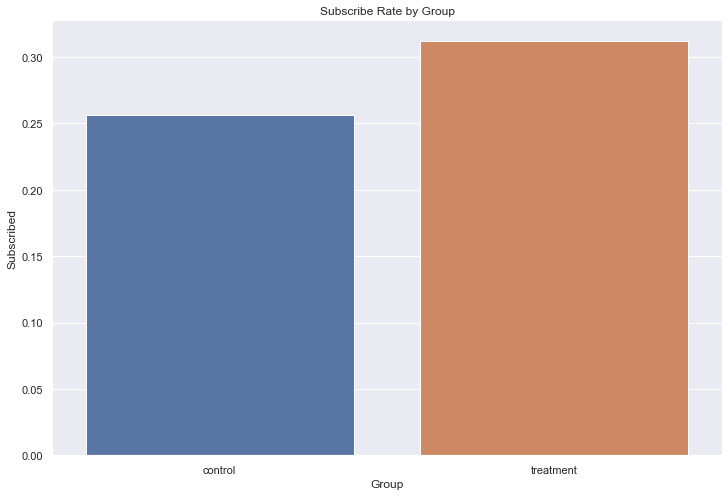

In [46]:
#Plot Subscription Rate Graph
plt.figure(figsize=(12,8))
plt.title('Subscribe Rate by Group')
plt.xlabel('Group')
plt.ylabel('Subscribe Rate')
sns.barplot(x=sample.Group,y=sample.Subscribed, ci=None)

In [45]:
#Print out final results
subscription=[xco,xtr]
obsnum=[min_n,min_n]
z, p = proportions_ztest(subscription, nobs=obsnum)
(lower_co, lower_tr), (upper_co, upper_tr) = proportion_confint(subscription, nobs=obsnum, alpha=0.05)

print('z statistic:',abs(z))
print('p value:',p)
print('confidence interval for control: ',lower_co,upper_co)
print('confidence interval for treatment: ',lower_tr,upper_tr)

z statistic: 3.104647905689466
p value: 0.0019050565307317756
confidence interval for control:  0.23180645354108353 0.2801935464589165
confidence interval for treatment:  0.2863158853044935 0.3376841146955065


There was greater than 5% increase in the subscription rate and a very low p value. This confirms our hypotheis that the 50% off discount will increase subscriptions. There is more subscriptions but this may not translate to revenue increase. If there is low customer retention then the company may lose revenue. Other steps for analysis would be to estimate the average customer retention rate and best discount amount to increase revenue.